In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
str_pca = pd.read_csv("./figure1/pca_str_50.csv", index_col = 0)
snp_pca = pd.read_csv("../SNP/1kg/pca_snp_50.csv", index_col = 0)
sample = pd.read_csv("../kg1/sample_type.csv")
snp_pca = snp_pca.merge(sample, left_on = snp_pca.index, right_on = "sample")
str_pca = str_pca.merge(sample, left_on = str_pca.index, right_on = "sample")

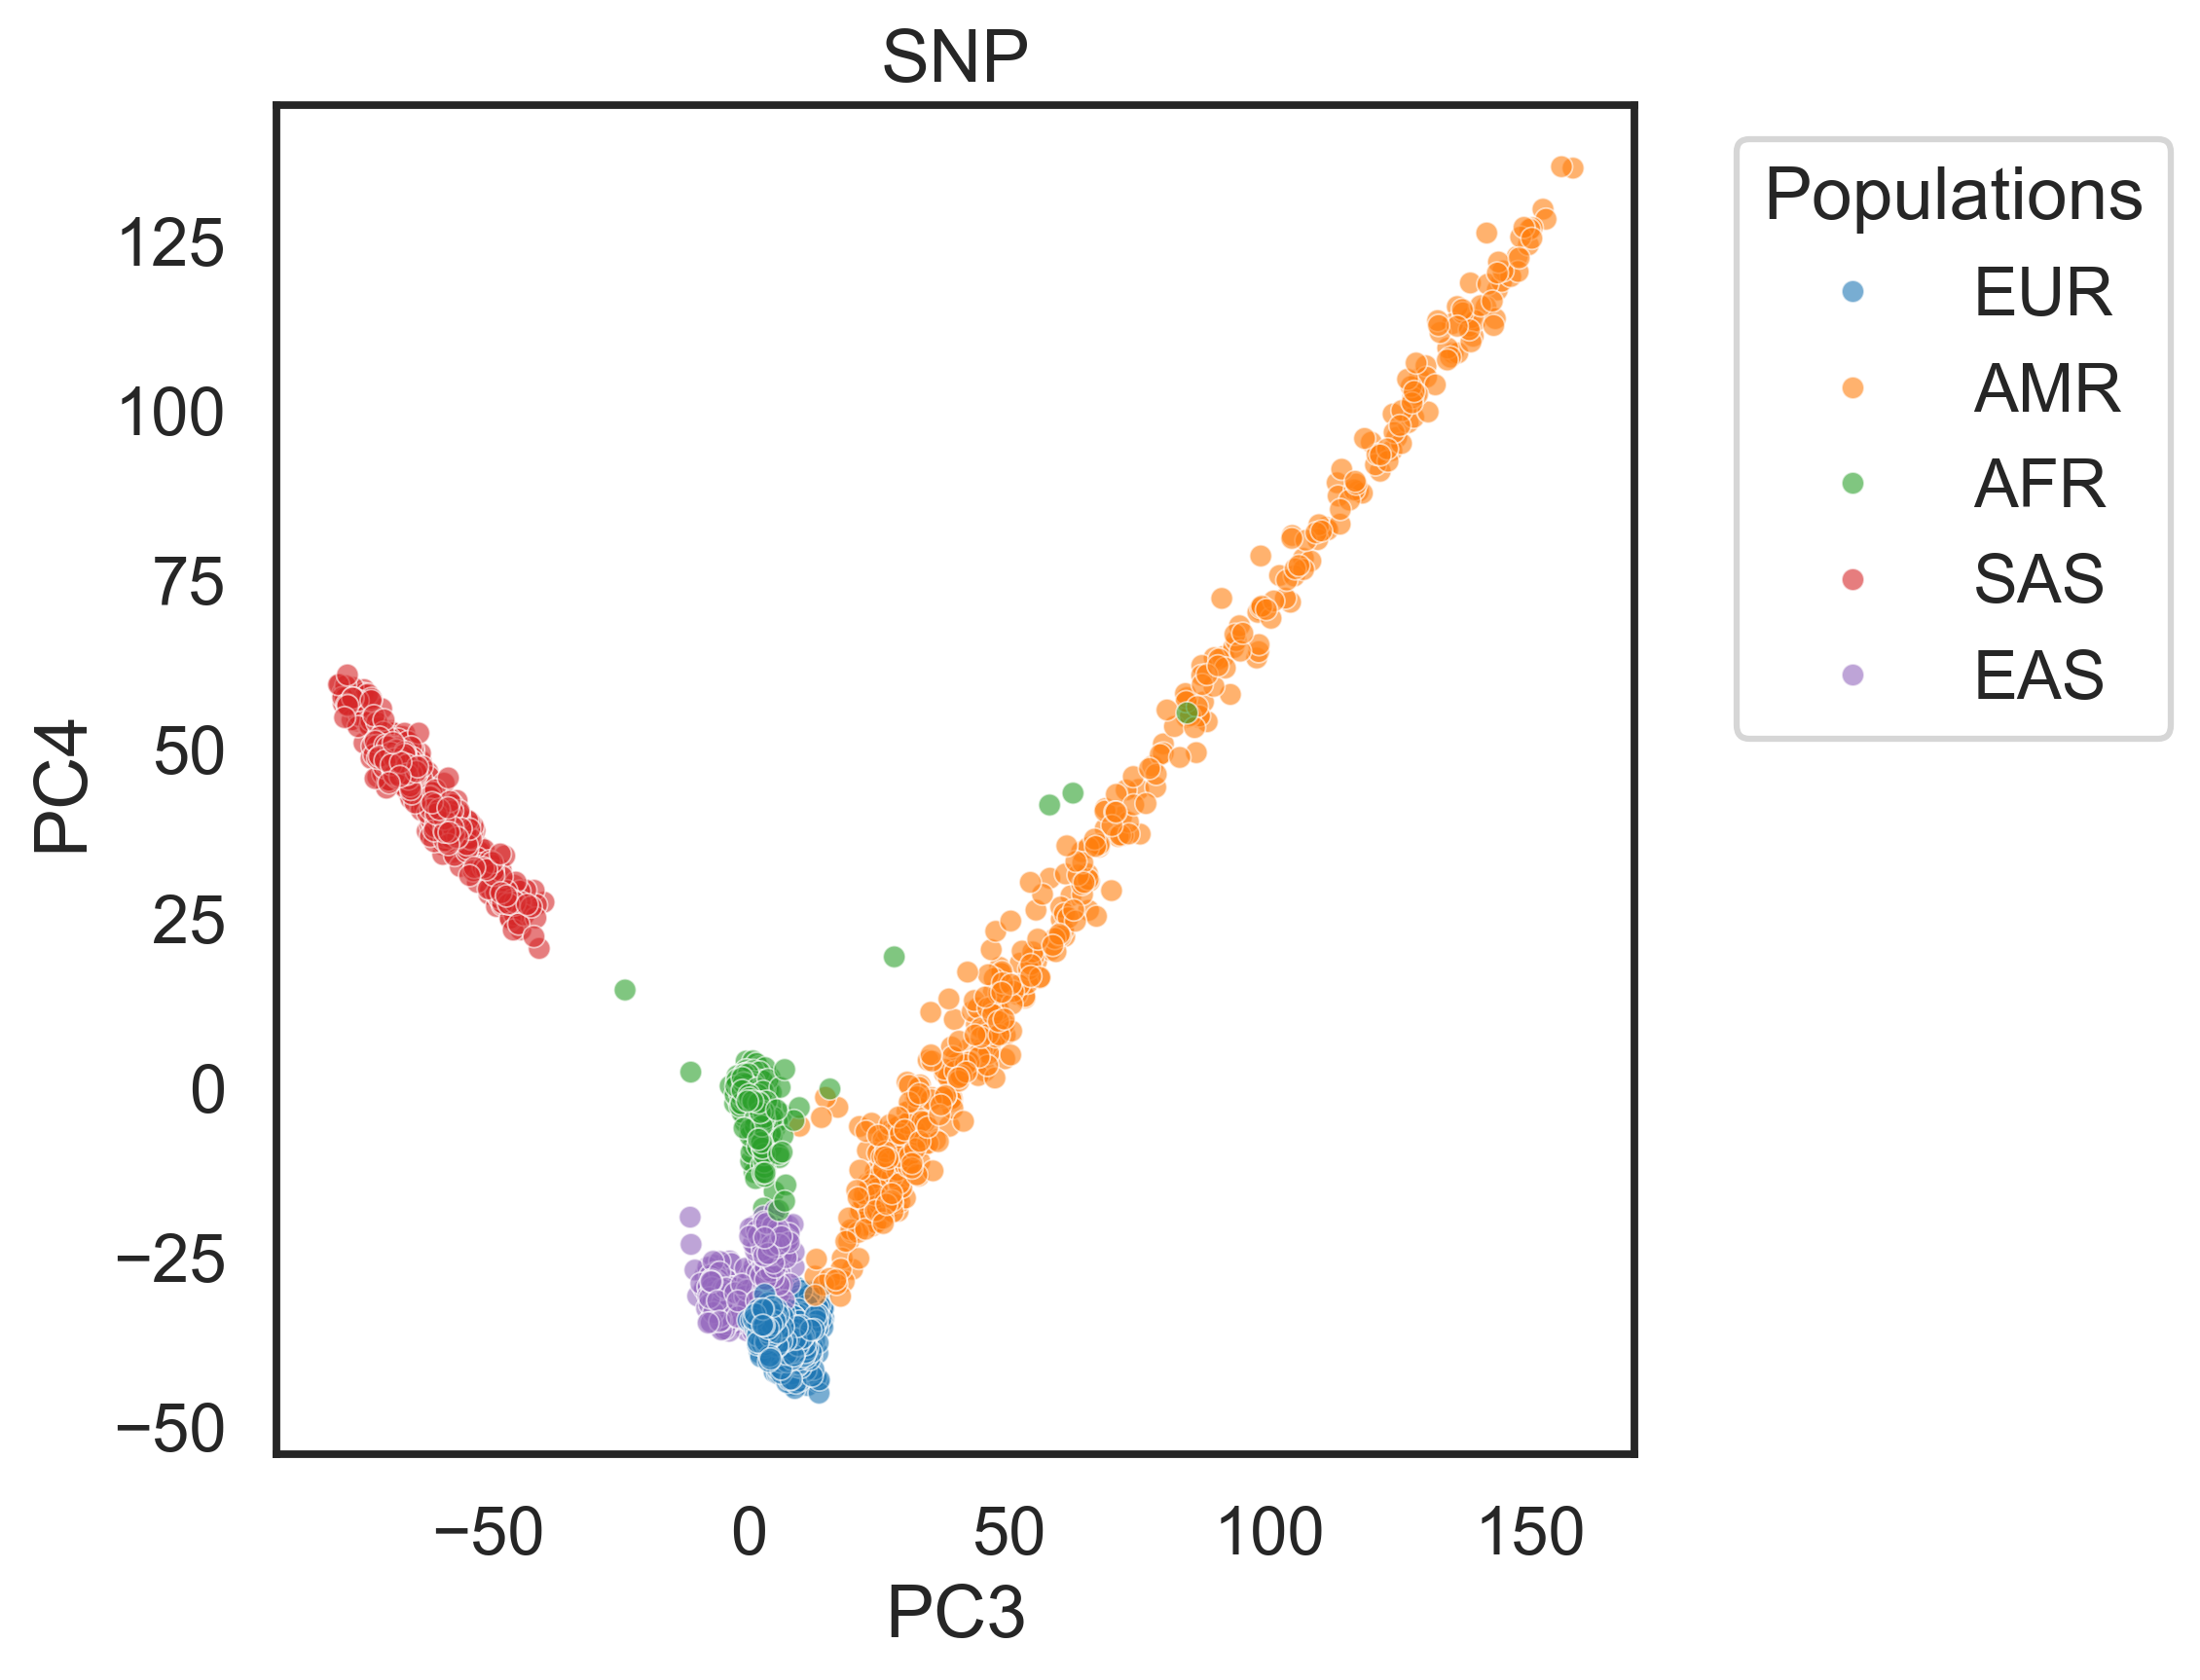

In [24]:
custom_order = ["EUR", "AMR", "AFR", "SAS", "EAS"]
custom_palette = dict(zip(custom_order, sns.color_palette("tab10", len(custom_order))))

plt.figure(figsize=(6, 6), dpi = 300)
sns.set_context("talk", font_scale=1.0)
sns.set_style("white")
sns.scatterplot(data = snp_pca, x = "2", y = "3", hue = "Superpopulation", 
                s = 30, alpha = 0.6,
                hue_order = custom_order,
                palette = custom_palette)
plt.title("SNP")
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.legend([],[], frameon=False)
plt.legend(title="Populations", bbox_to_anchor=(1.05, 1), loc='upper left')

In [25]:
#hg_str_pca = pd.read_csv("./figure1/hg_pca_str.csv")
hg_snp_pca = pd.read_csv("./figure1/hg_pca_snp.csv")

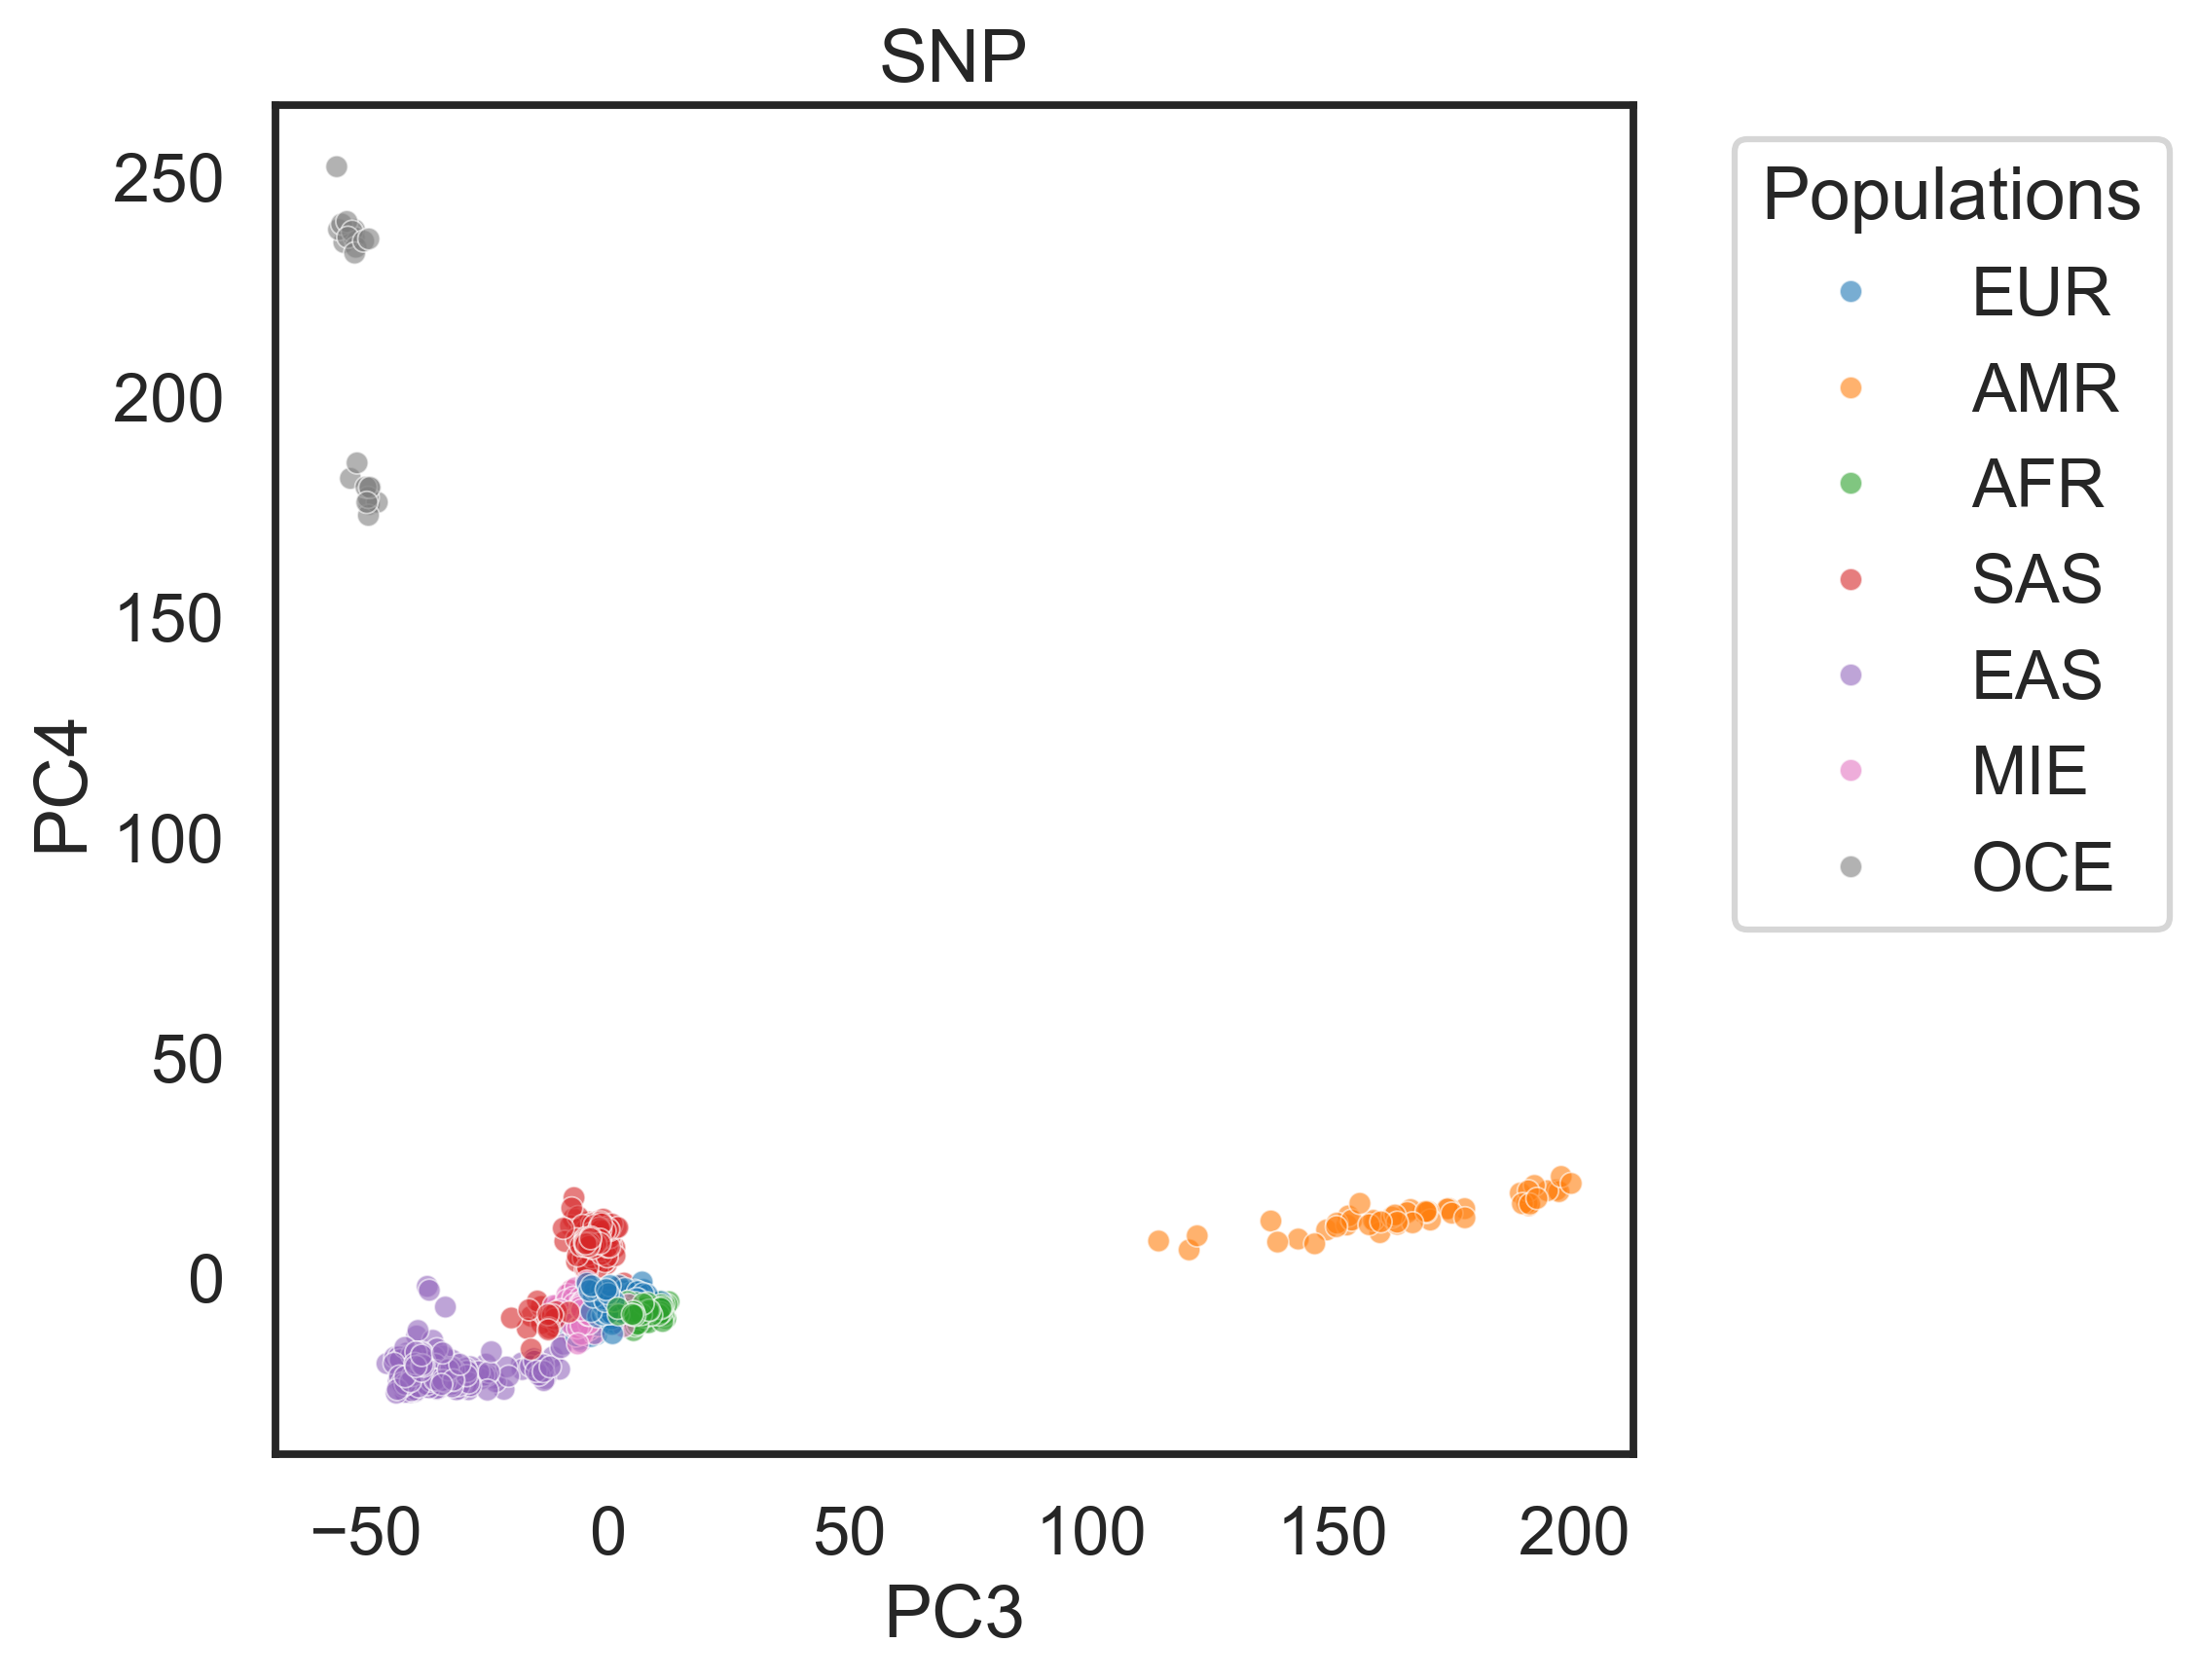

In [28]:
pop_order = hg_snp_pca["Superpopulation"]
custom_palette = sns.color_palette("tab10", n_colors = pop_order.nunique()+1)
selected_colors = [custom_palette[i] for i in [0,1, 2, 3, 4, 6, 7]]
lut = dict(zip(["Europe","America", "Africa", "Central South Asia", 
 "East Asia", "Middle East", "Oceania"], selected_colors))
new_labels = ["EUR", "AMR", "AFR", "SAS", "EAS", "MIE", "OCE"]
plt.figure(figsize=(6, 6), dpi = 300)
sns.set_context("talk", font_scale=1.0)
sns.set_style("white")
ax = sns.scatterplot(data = hg_snp_pca, x = "2", y = "3", hue = "Superpopulation", 
                s = 30, alpha = 0.6,
                hue_order = lut,
                palette = selected_colors)
plt.title("SNP")
plt.xlabel("PC3")
plt.ylabel("PC4")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels, title = "Populations", bbox_to_anchor=(1.05,1.0), loc='upper left')

In [25]:
snp_pca_acc = pd.read_csv("./figure1/snp_1kg_pca_acc_new.csv")
str_pca_acc = pd.read_csv("./figure1/str_1kg_pca_acc.csv")

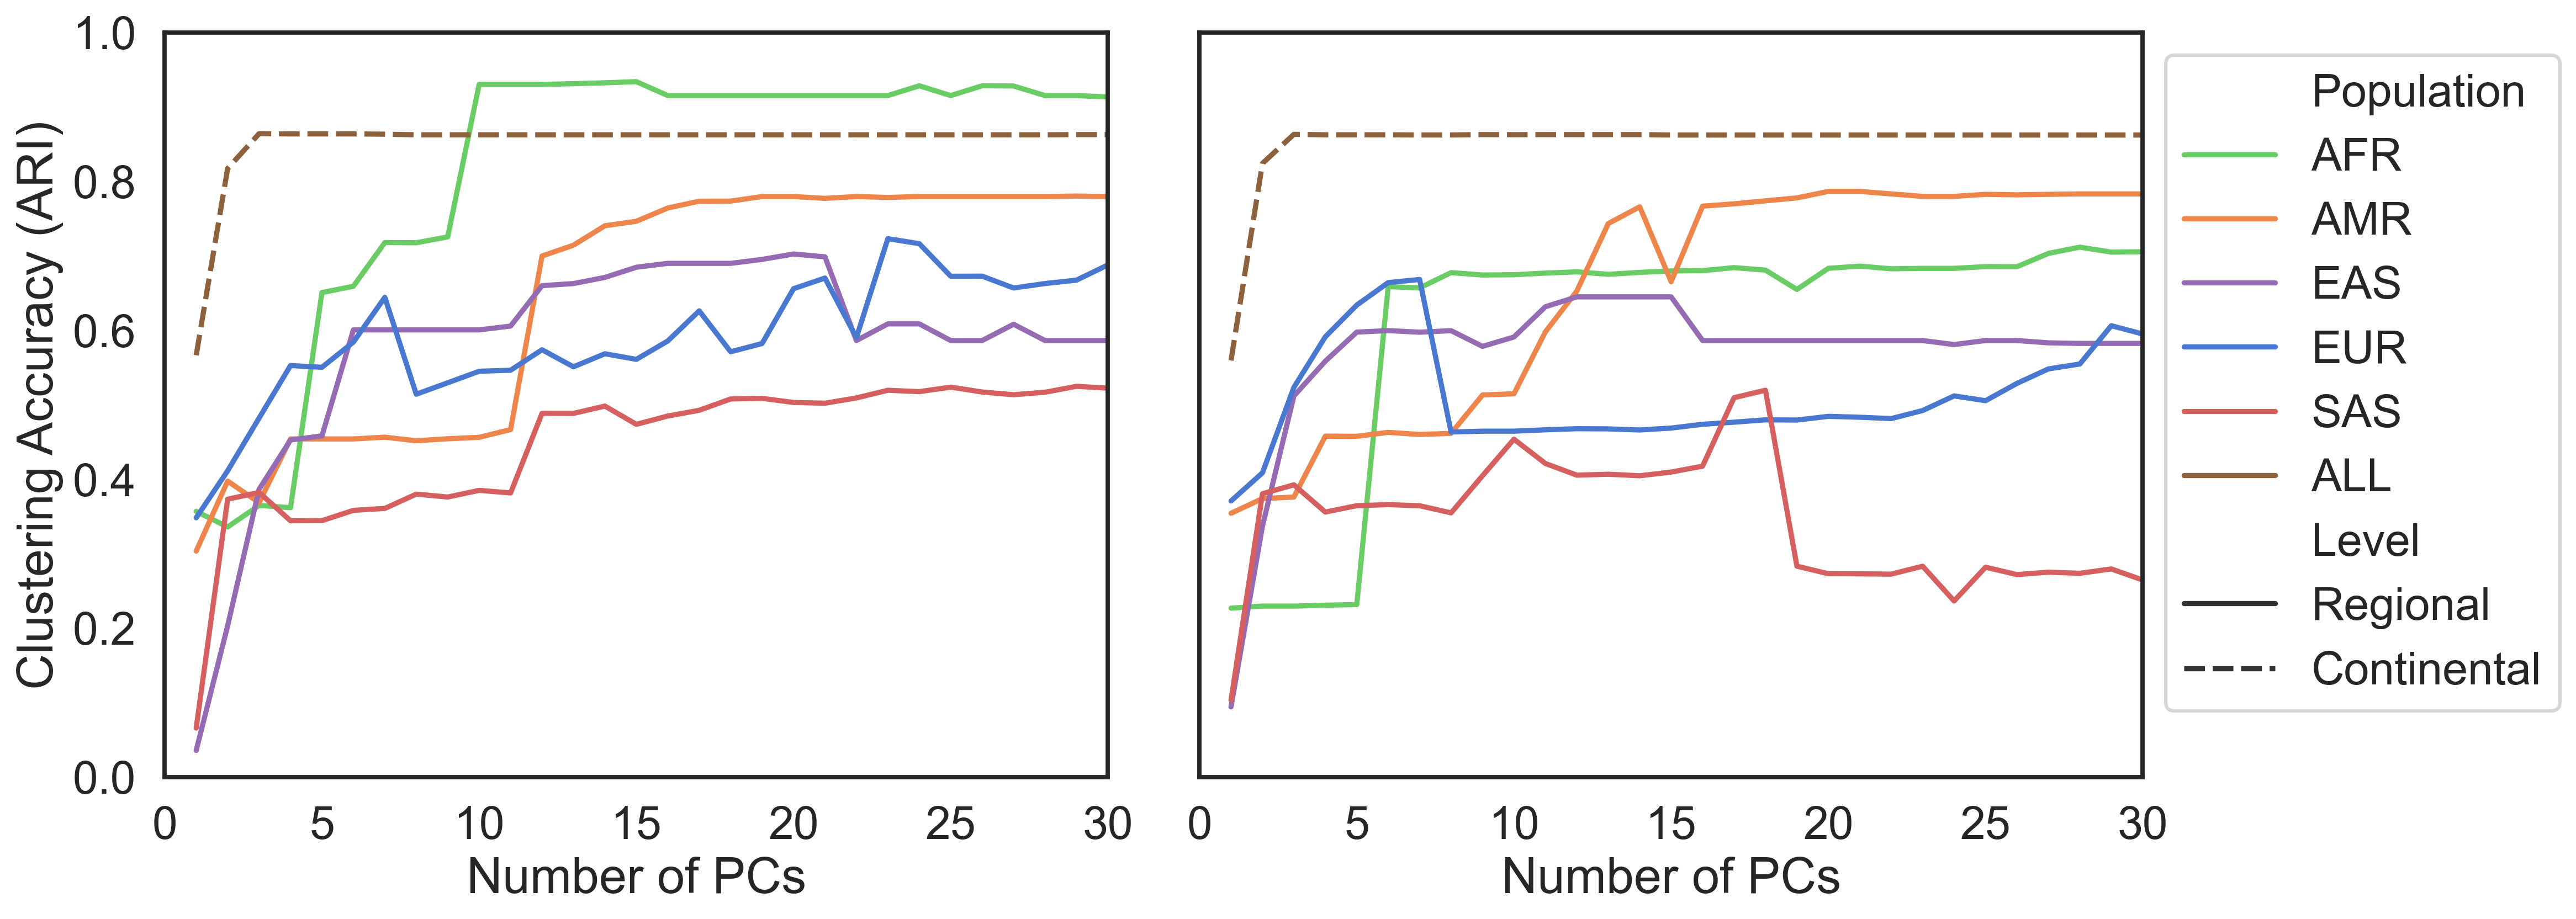

In [153]:
custom_order = ["EUR", "AMR", "AFR", "SAS", "EAS", "ALL"]
custom_palette = dict(zip(custom_order, sns.color_palette("muted", len(custom_order))))

fig, axes = plt.subplots(1, 2, figsize = (16,6), dpi = 300,
                         sharey = True)
sns.set_theme(context = "talk", style="white", font_scale = 1.2)
sns.lineplot(ax = axes[0],
        data = str_pca_acc,
        x = "Num_PCs", y = "ARI_mean",
        style = "Level",
        hue = "Group",
        palette = custom_palette)
axes[0].legend_.remove()
axes[0].set_xlim(0,30)
axes[0].set_ylim(0,1)
axes[0].set_xlabel("Number of PCs")
axes[0].set_ylabel("Clustering Accuracy (ARI)")

sns.lineplot(ax = axes[1],
        data = snp_pca_acc,
        x = "Num_PCs", y = "ARI_mean",
        style = "Level",
        hue = "Group",
        palette = custom_palette)
#axes[1].legend_.remove()
axes[1].set_xlim(0,30)
axes[1].set_ylim(0,1)
axes[1].set_xlabel("Number of PCs")
#plt.legend(bbox_to_anchor=(1, 1), loc='upper left')#, fontsize = 15)
handles, labels = axes[1].get_legend_handles_labels()
labels[0] = "Population"
labels[-1] = "Continental"
labels[-2] = "Regional"
axes[1].legend(handles, labels, bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()

In [48]:
tsne = pd.read_csv("./figure1/snp_tsne.csv")
#tsne = pd.read_csv("./figure1/str_tsne.csv") #15PC

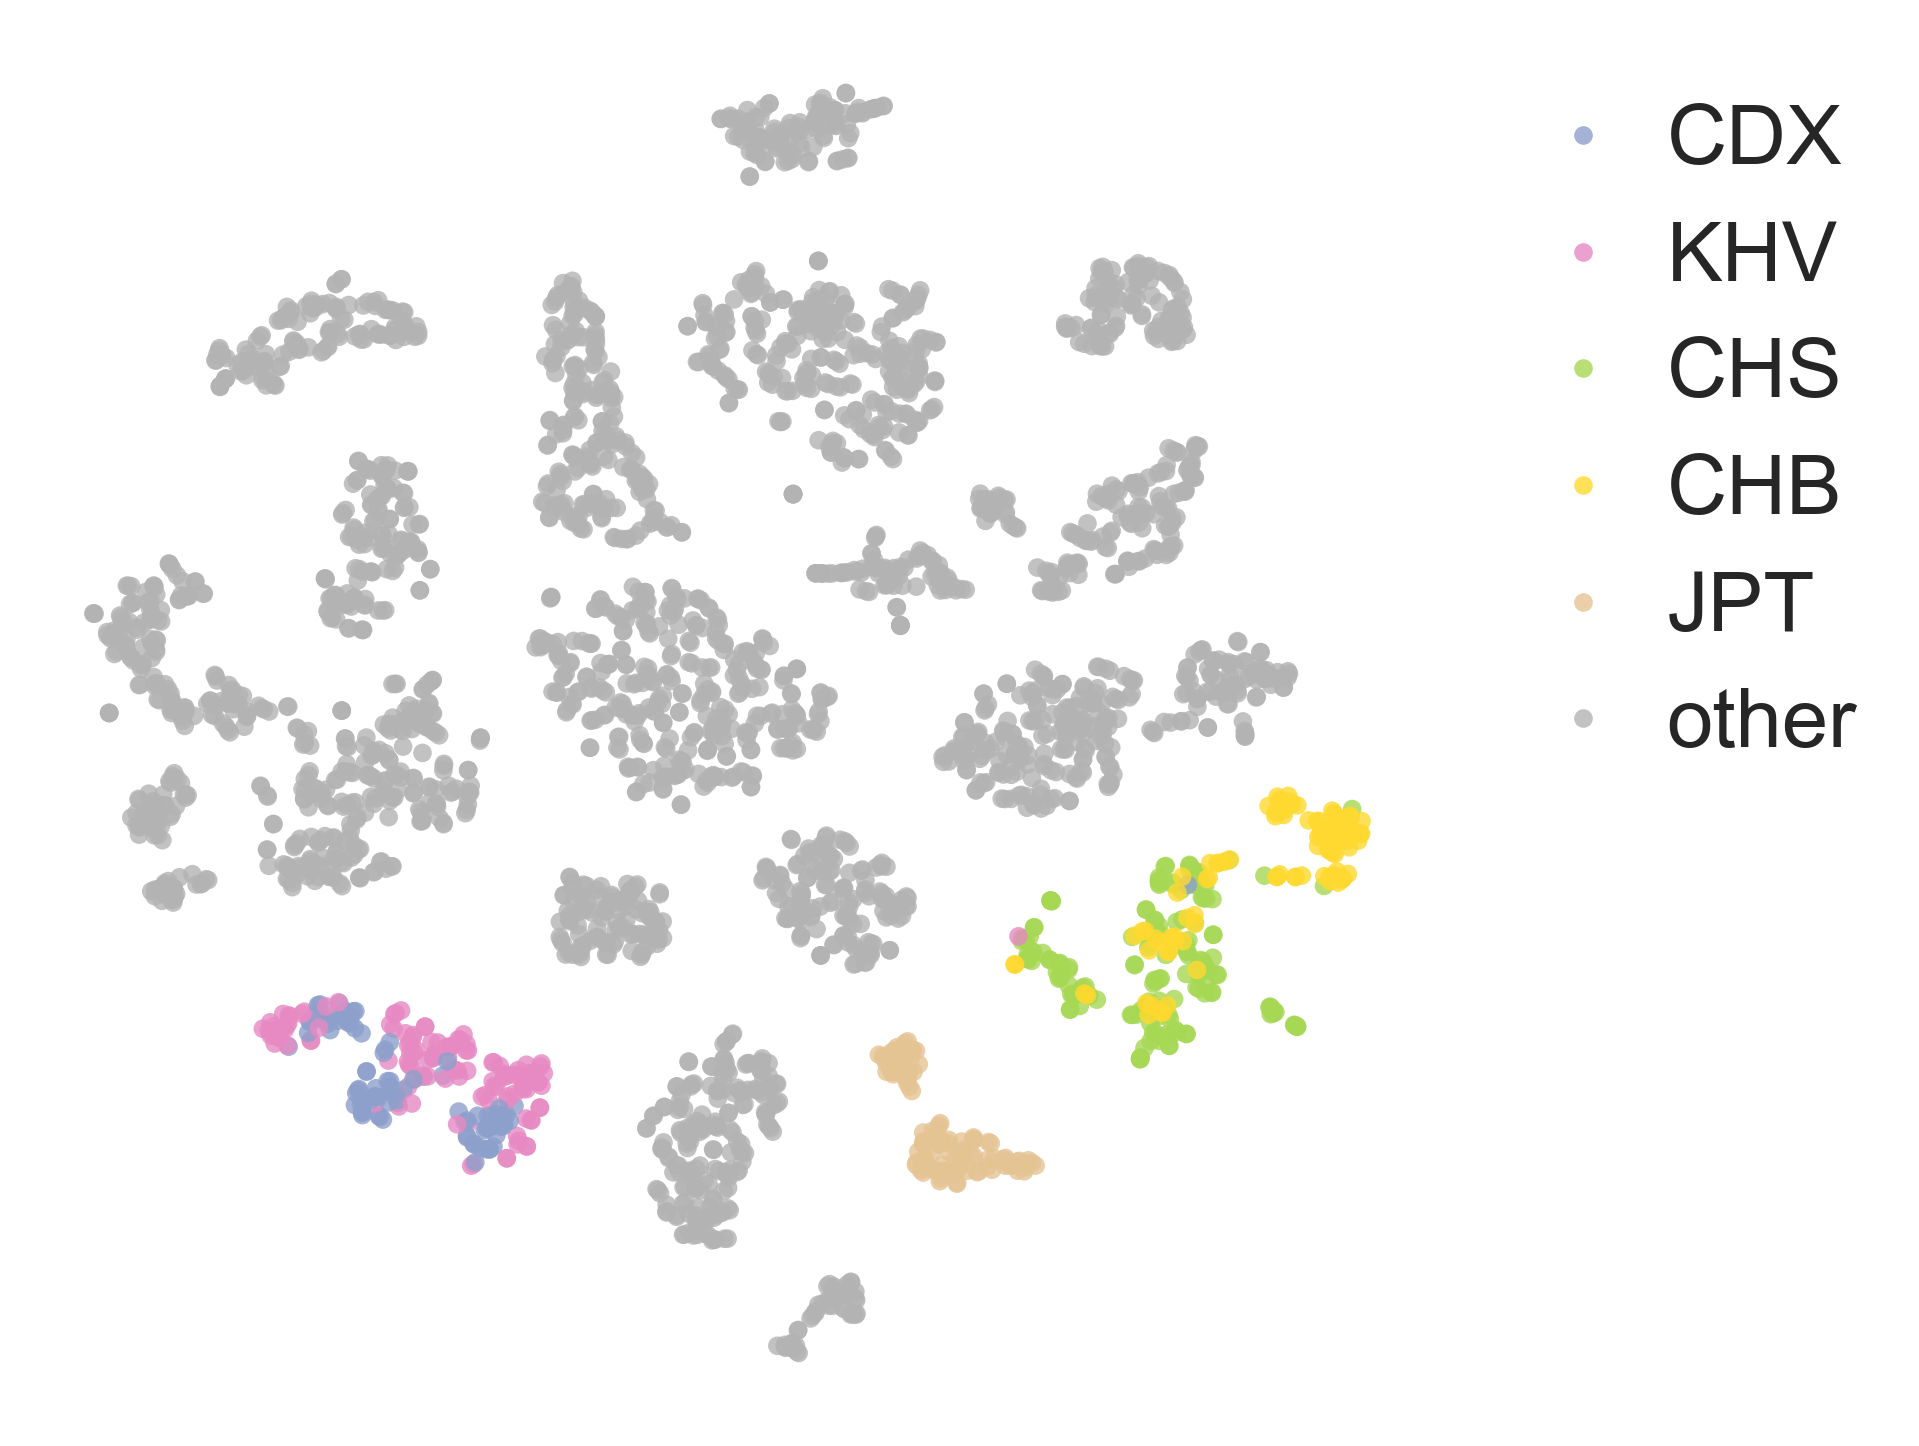

In [55]:
afr_order = ["LWK", "ESN", "YRI", "MSL", "GWD", "ACB", "ASW"]
amr_order = ["CLM", "MXL", "PUR", "PEL"]
eur_order = ["TSI", "IBS", "GBR", "CEU", "FIN"]
sas_order =  ["PJL", "GIH", "ITU", "STU", "BEB"]
eas_order = ["CDX", "KHV", "CHS", "CHB", "JPT"]
em_plot = tsne.copy()
em_plot.loc[em_plot["Superpopulation"] != "EAS", "Population"] = "other"

plt.figure(figsize=(6, 6), dpi = 300)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
sns.scatterplot(data = em_plot,#.query("Superpopulation == 'AFR' "), 
                x = "0", y = "1", 
                hue = "Population", 
                linewidth = 0,
                s = 20,
                alpha = 0.8,
                hue_order = eas_order + ["other"],
                palette = sns.color_palette("Set2")[2:])
                #palette = "Set2")
sns.despine(top=True, right=True, bottom=True, left=True)
plt.xticks(ticks=[], labels=[])
plt.yticks(ticks=[], labels=[])
#plt.title("AFR", fontsize=25)
plt.xlabel("")
plt.ylabel("")
plt.legend(#title="Superpopulation", 
           bbox_to_anchor=(1, 1), 
           loc='upper left', 
           fontsize = 20,
           handletextpad = 0,
           columnspacing = 0.2,
           ncol = 1,
           frameon=False)

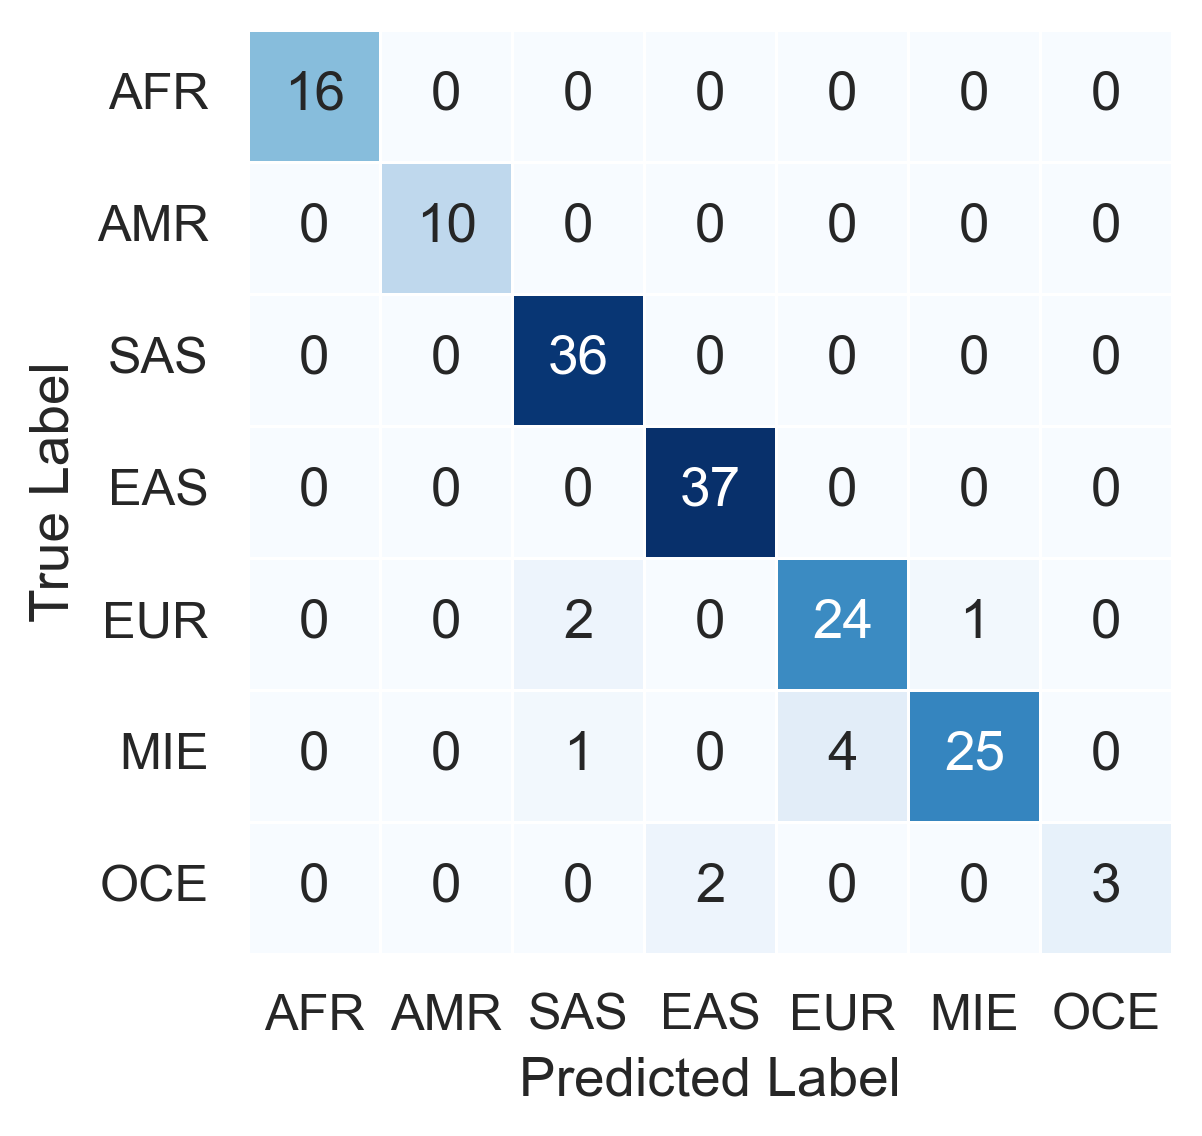

In [146]:
cm_df = pd.read_csv("./figure1/hg_str_rf.csv", index_col = 0)
hg_map = {"East Asia" : "EAS", "Central South Asia" : "SAS", 
          "Middle East": "MIE", "Europe" : "EUR", "Africa" : "AFR",
          "America" : "AMR", "Oceania" : "OCE"}
cm_df.columns =[hg_map[i] for i in cm_df.columns]
cm_df.index =[hg_map[i] for i in cm_df.index]

plt.figure(figsize=(6, 4), dpi = 300)
sns.set_theme(style="white", font_scale = 1.1)
#sns.set(font_scale=1.5)
g = sns.heatmap(cm_df, annot = True, fmt='d', 
            linewidth=.3, 
            #linecolor="gray",
            #mask = mask,
            cbar = False,
            square = True,
            cmap = "Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
#plt.title("Confusion Matrix")
plt.show()

In [ ]:
sample = pd.read_csv("../kg1/sample_type.csv")
cm_df = pd.read_csv("./figure1/kg_snp_rf.csv", index_col = 0)

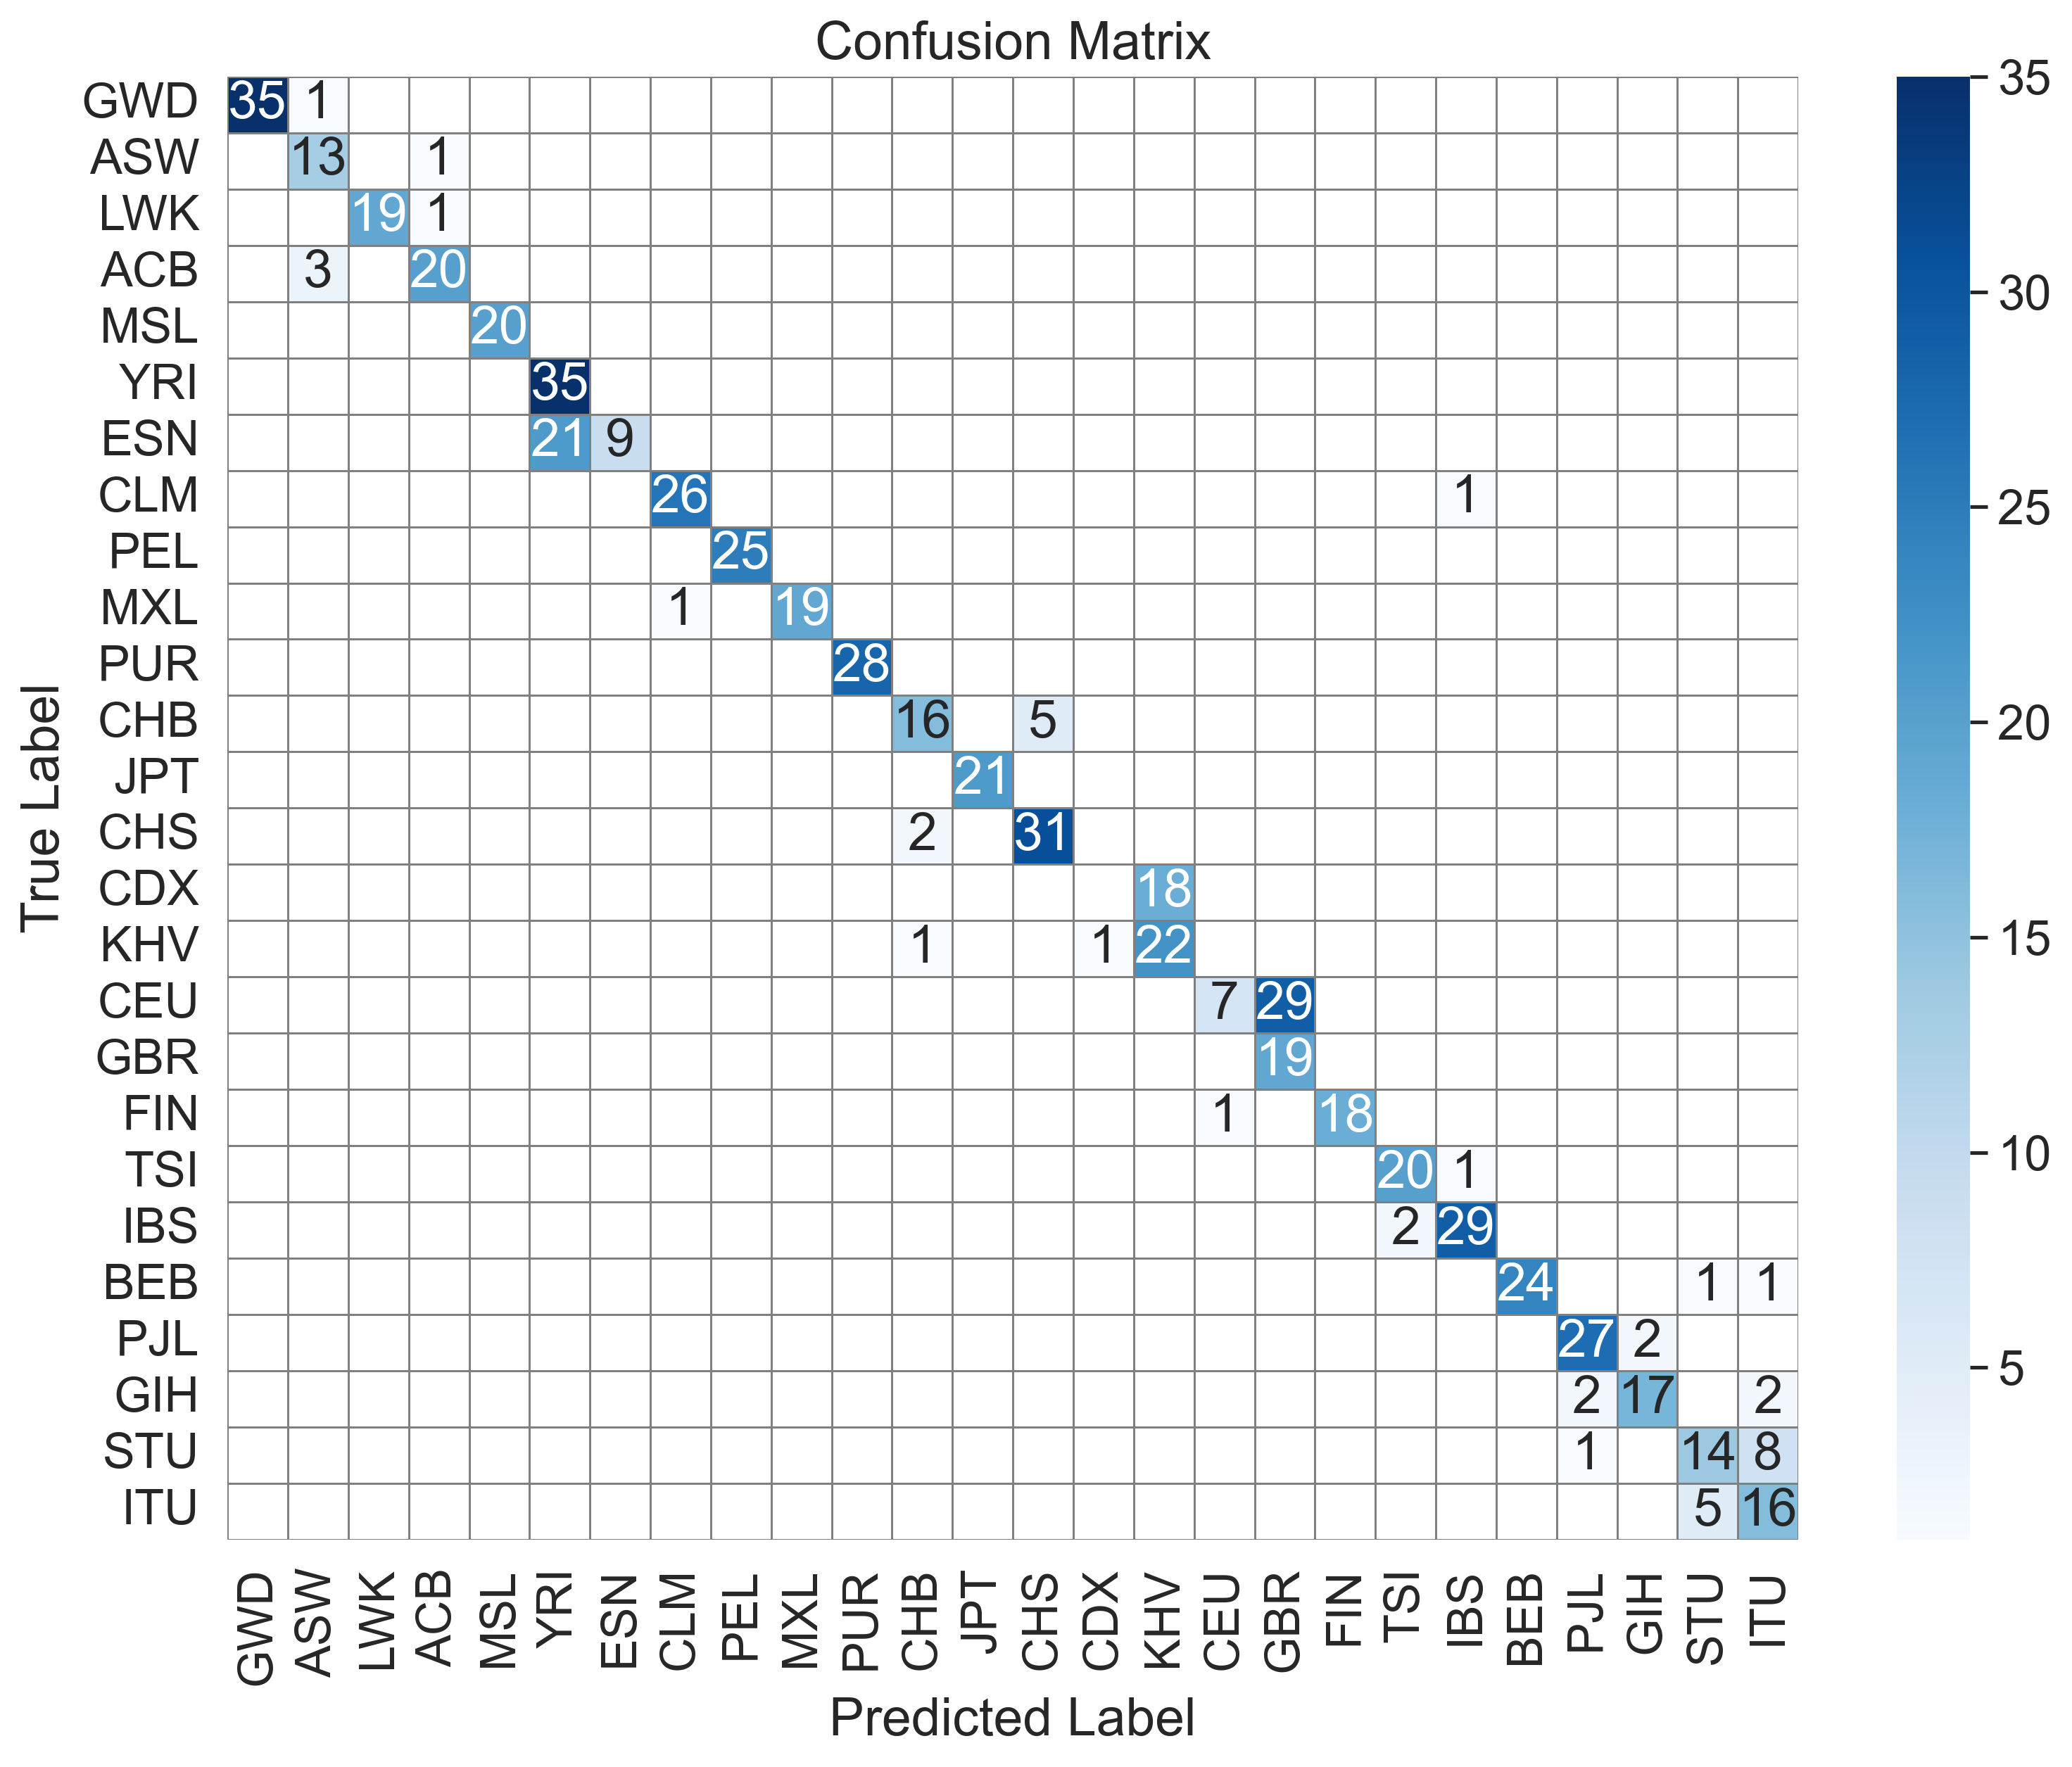

In [80]:
super = ["AFR", "AMR", "EAS", "EUR", "SAS"]
new_index = [
    list(sample.loc[sample["Superpopulation"] == i, "Population"].unique())
    for i in super
]
flat_index = [item for sublist in new_index for item in sublist]
cm_df = cm_df.reindex(labels=flat_index)
cm_df = cm_df[flat_index]
mask = (cm_df == 0)

# Plot confusion matrix
plt.figure(figsize=(12, 9), dpi = 300)
sns.set_theme(style="white", font_scale = 1.5)
#sns.set(font_scale=1.5)
sns.heatmap(cm_df, annot = True, fmt='d', 
            linewidth=.3, 
            linecolor="gray",
            mask = mask,
            cmap = "Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [154]:
ds_cv = pd.read_csv("./figure1/downsample_cv.csv")
chr_cv = pd.read_csv("./figure1/chr_cv.csv")

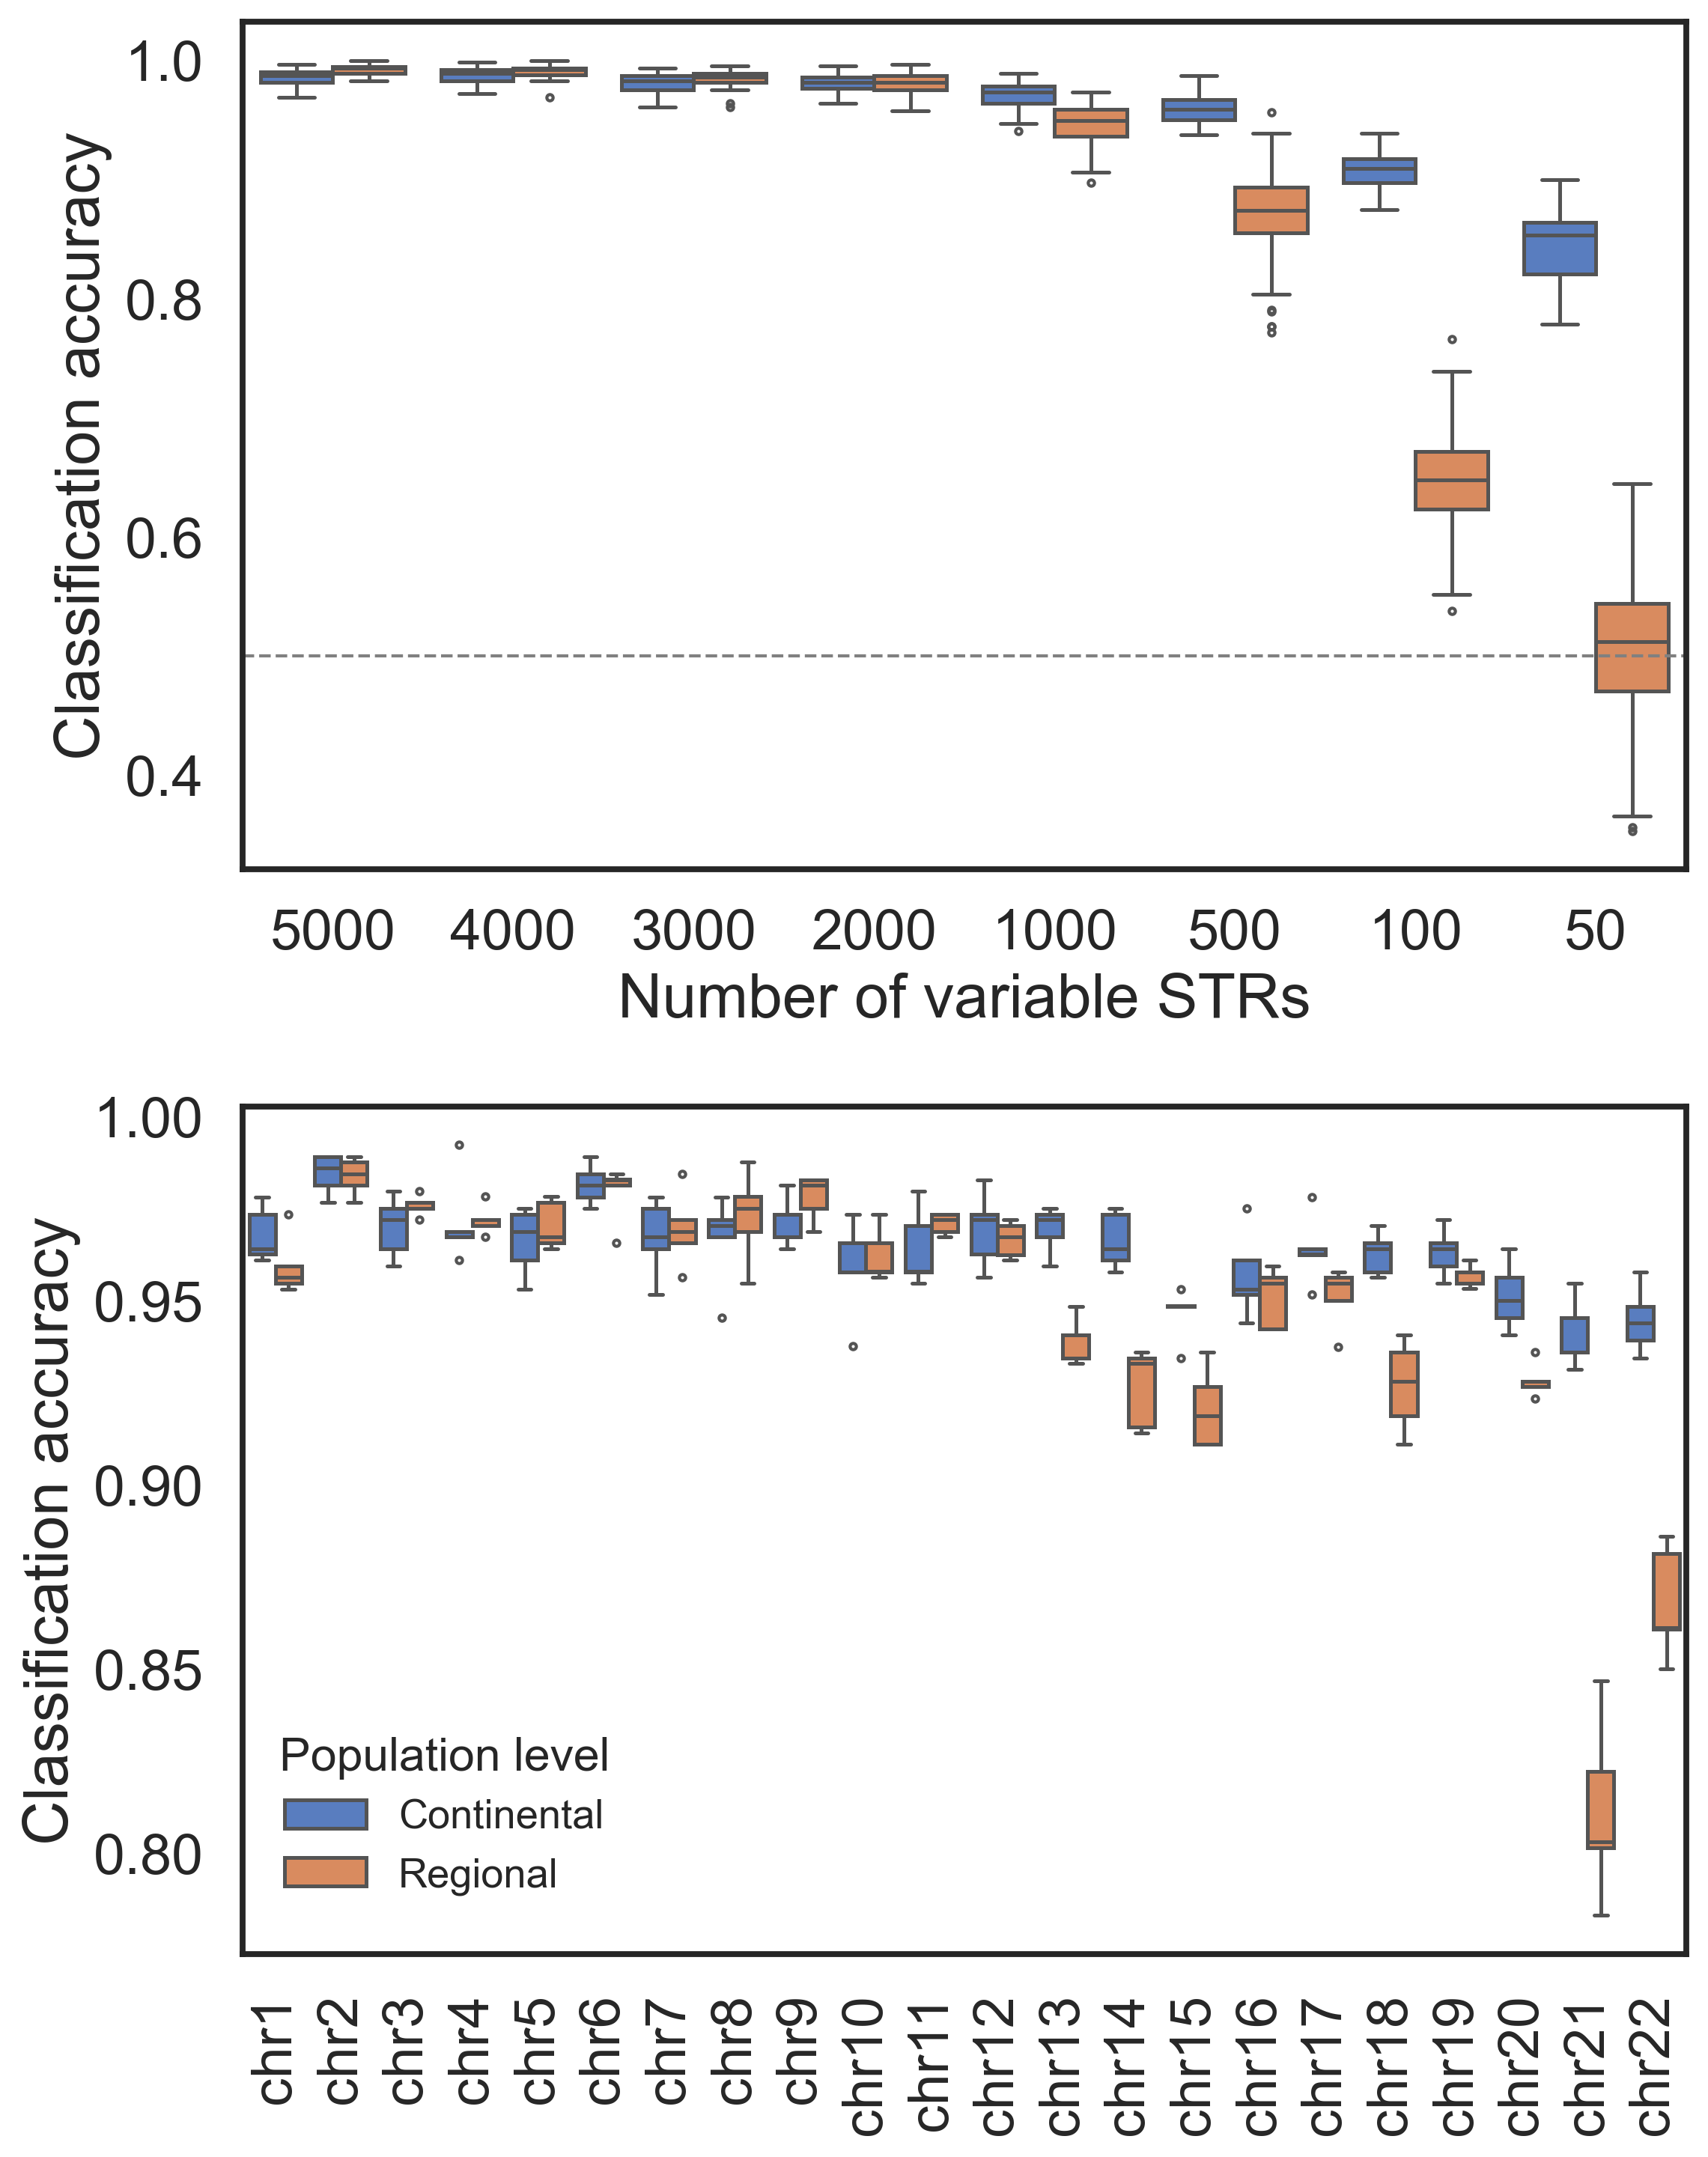

In [156]:

fig, axes = plt.subplots(2, 1, figsize = (8, 10), dpi = 300)
sns.set_theme(context="talk", style="white", font_scale = 1.1)

melt_test = pd.melt(ds_cv, id_vars = ["num"], value_vars = ["super", "pop"])
y1_order = np.array(ds_cv["num"].unique(), dtype="str")

melt_chr = pd.melt(chr_cv, id_vars = ["chr"], value_vars = ["super", "pop"])
y2_order= ["chr" + str(i) for i in range(1,23)]

sns.boxplot(ax = axes[0],
            data = melt_test, 
            x = "num", 
            y = "value", 
            hue = "variable",
            linewidth = 1.2,
            fliersize = 2,
            order = np.flip(y1_order),
            palette = "muted")
axes[0].axhline(0.5, ls="--", c="gray", lw=1)
axes[0].set_xlabel("Number of variable STRs")
axes[0].set_ylabel("Classification accuracy")
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend_.remove()

sns.boxplot(ax = axes[1],
            data = melt_chr, 
            x = "chr", 
            y = "value", 
            hue = "variable",
            linewidth = 1.2,
            fliersize = 2,
            order = y2_order,
            palette = "muted")
axes[1].set_ylabel("Classification accuracy")
axes[1].set_xlabel("")
axes[1].tick_params(axis="x", rotation = 90)
axes[1].legend(
    handles[:2], ["Continental", "Regional"], 
    title="Population level", fontsize=13, title_fontsize=15,
    loc="upper left", bbox_to_anchor=(0,0.3), frameon=False
)

plt.tight_layout()

In [3]:

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering
import matplotlib.patches as mpatches

In [105]:
hg_sample = pd.read_csv("../hgdp/hgdp_sample.csv")
hg_sample["Population"] = [i.split(",")[0] for i in hg_sample["Population"]]
hg_sample["Superpopulation"] = [i[:-7] for i in hg_sample["Superpopulation"]]

In [106]:
hg_str_dist = pd.read_csv("./figure1/hg_str_dist.csv", index_col = 0)

In [25]:
hg_snp_dist_id = pd.read_csv("../SNP/1kg/kg_snp_dist.mdist.id", sep = "\t", 
                          names= ["sample", "col_sample"])
hg_snp_dist = pd.read_csv("../SNP/1kg/kg_snp_dist.mdist", sep = "\t", 
                          names = hg_snp_dist_id["sample"])
hg_snp_dist.index = hg_snp_dist.columns

In [107]:

hg_snp_dist_id = pd.read_csv("../SNP/hgdp/dist/hg_snp_dist.id", sep = "\t", 
                          names= ["sample", "col_sample"])
hg_snp_dist = pd.read_csv("../SNP/hgdp/dist/hg_snp_dist.mdist", sep = "\t", 
                          names = hg_snp_dist_id["sample"])
hg_snp_dist.index = hg_snp_dist.columns

In [108]:
inter = np.intersect1d(hg_sample["Sample"], hg_snp_dist_id["sample"])
hg_snp_dist = hg_snp_dist.loc[inter, inter]
hg_str_dist = hg_str_dist.loc[inter, inter]

In [141]:
Z = hierarchy.linkage(hg_str_dist, method = 'ward')
Z = optimal_leaf_ordering(Z, hg_str_dist)  

C:\Users\xiaf\AppData\Local\Temp\ipykernel_1504\4181349861.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(hg_str_dist, method = 'ward')
C:\Users\xiaf\AppData\Local\Temp\ipykernel_1504\4181349861.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = optimal_leaf_ordering(Z, hg_str_dist)


In [ ]:
kg_sample = pd.read_csv("../kg1/sample_type.csv")
kg_sample = kg_sample.query("Superpopulation != 'H3Africa' ")
kg_sample.index = kg_sample["sample"]
pop_order = kg_sample["Superpopulation"]
palette = sns.color_palette("tab10", n_colors = pop_order.nunique())
lut = dict(zip(["EUR","AMR", "AFR", "SAS", "EAS"], palette))
#row_colors = pop_order.map(lut)
row_colors = pop_order.reindex(hg_snp_dist.columns).map(lut)
row_colors.name = None
plt.figure(figsize=(5, 5), dpi = 300)
g = sns.clustermap(data = hg_snp_dist,
                    row_linkage=Z,
                    col_linkage=Z,
                    cmap = "Purples_r",
                   yticklabels=False, xticklabels=False,
                   cbar_kws={"ticks":[0,5,10,15,20]},
                   row_colors = row_colors)
#new_labels = ["EUR", "AMR", "AFR", "CSA", "EAS", "MIE", "OCE"]
# Create legend handles from the lut dictionary
handles = [mpatches.Patch(color=color, label=pop) for pop, color in lut.items()]
# Add legend
g.ax_heatmap.legend(
    handles=handles,
    #labels = new_labels,
    title="Population",
    bbox_to_anchor=(1.3, 0.5),  # position to the right of the plot
    bbox_transform=plt.gcf().transFigure,
    loc='lower right',
    ncol=1
)

<Figure size 1500x1500 with 0 Axes>

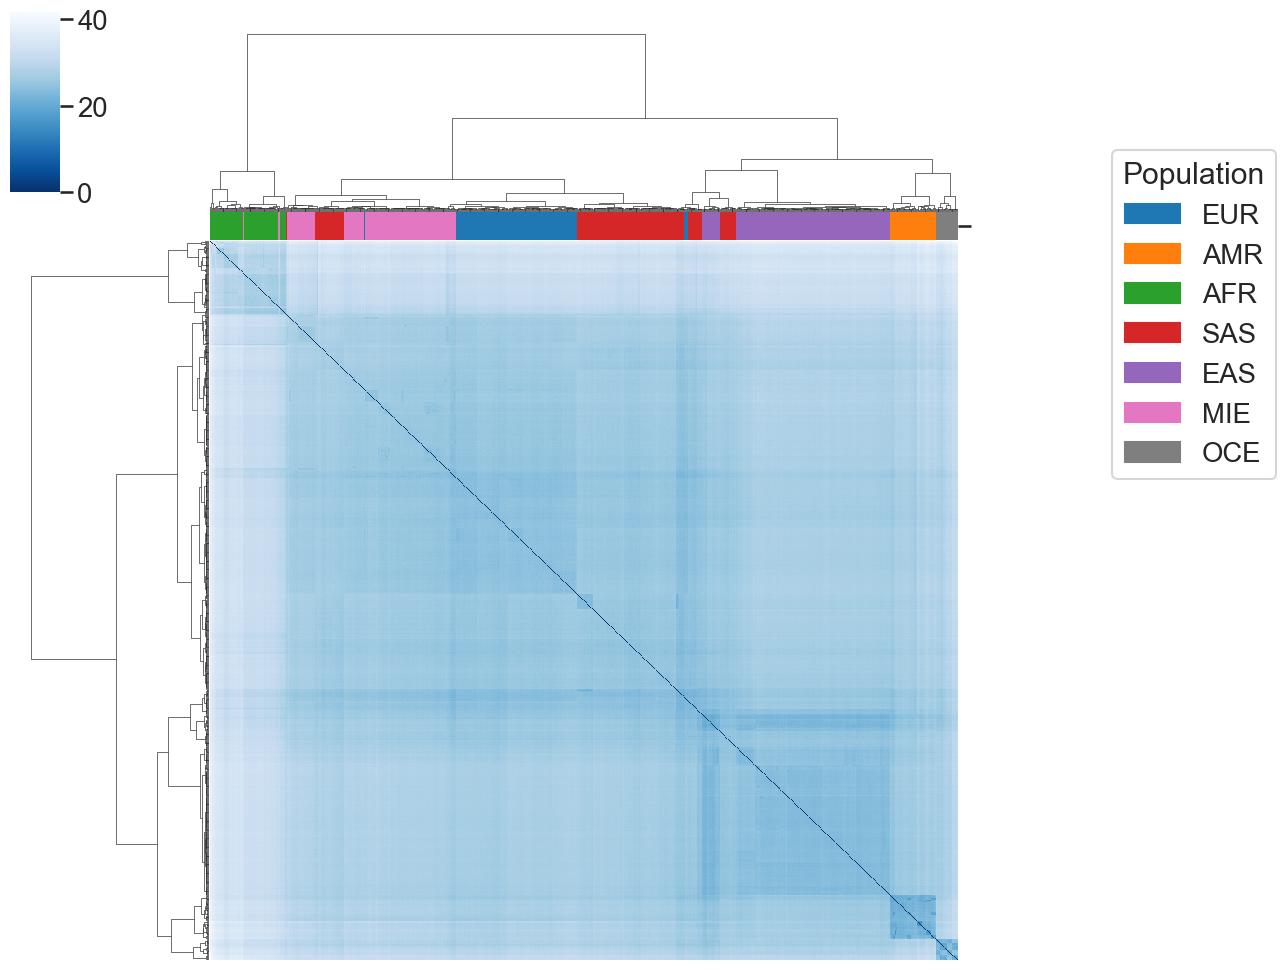

In [145]:
hg_sample.index = hg_sample["Sample"]
pop_order = hg_sample["Superpopulation"]
palette = sns.color_palette("tab10", n_colors = pop_order.nunique()+1)
selected_colors = [palette[i] for i in [0,1, 2, 3, 4, 6, 7]]
lut = dict(zip(["Europe","America", "Africa", "Central South Asia", 
 "East Asia", "Middle East", "Oceania"], selected_colors))
#row_colors = pop_order.map(lut)
row_colors = pop_order.reindex(hg_str_dist.columns).map(lut)
row_colors.name = None
plt.figure(figsize=(5, 5), dpi = 300)
g = sns.clustermap(data = hg_str_dist,
                    row_linkage=Z,
                    col_linkage=Z,
                    cmap = "Blues_r",
                   yticklabels=False, xticklabels=False,
                   col_colors = row_colors)
new_labels = ["EUR", "AMR", "AFR", "SAS", "EAS", "MIE", "OCE"]
# Create legend handles from the lut dictionary
handles = [mpatches.Patch(color=color, label=pop) for pop, color in lut.items()]
# Add legend
g.ax_heatmap.legend(
    handles=handles,
    labels = new_labels,
    title="Population",
    bbox_to_anchor=(1.3, 0.5),  # position to the right of the plot
    bbox_transform=plt.gcf().transFigure,
    loc='lower right',
    ncol=1
)

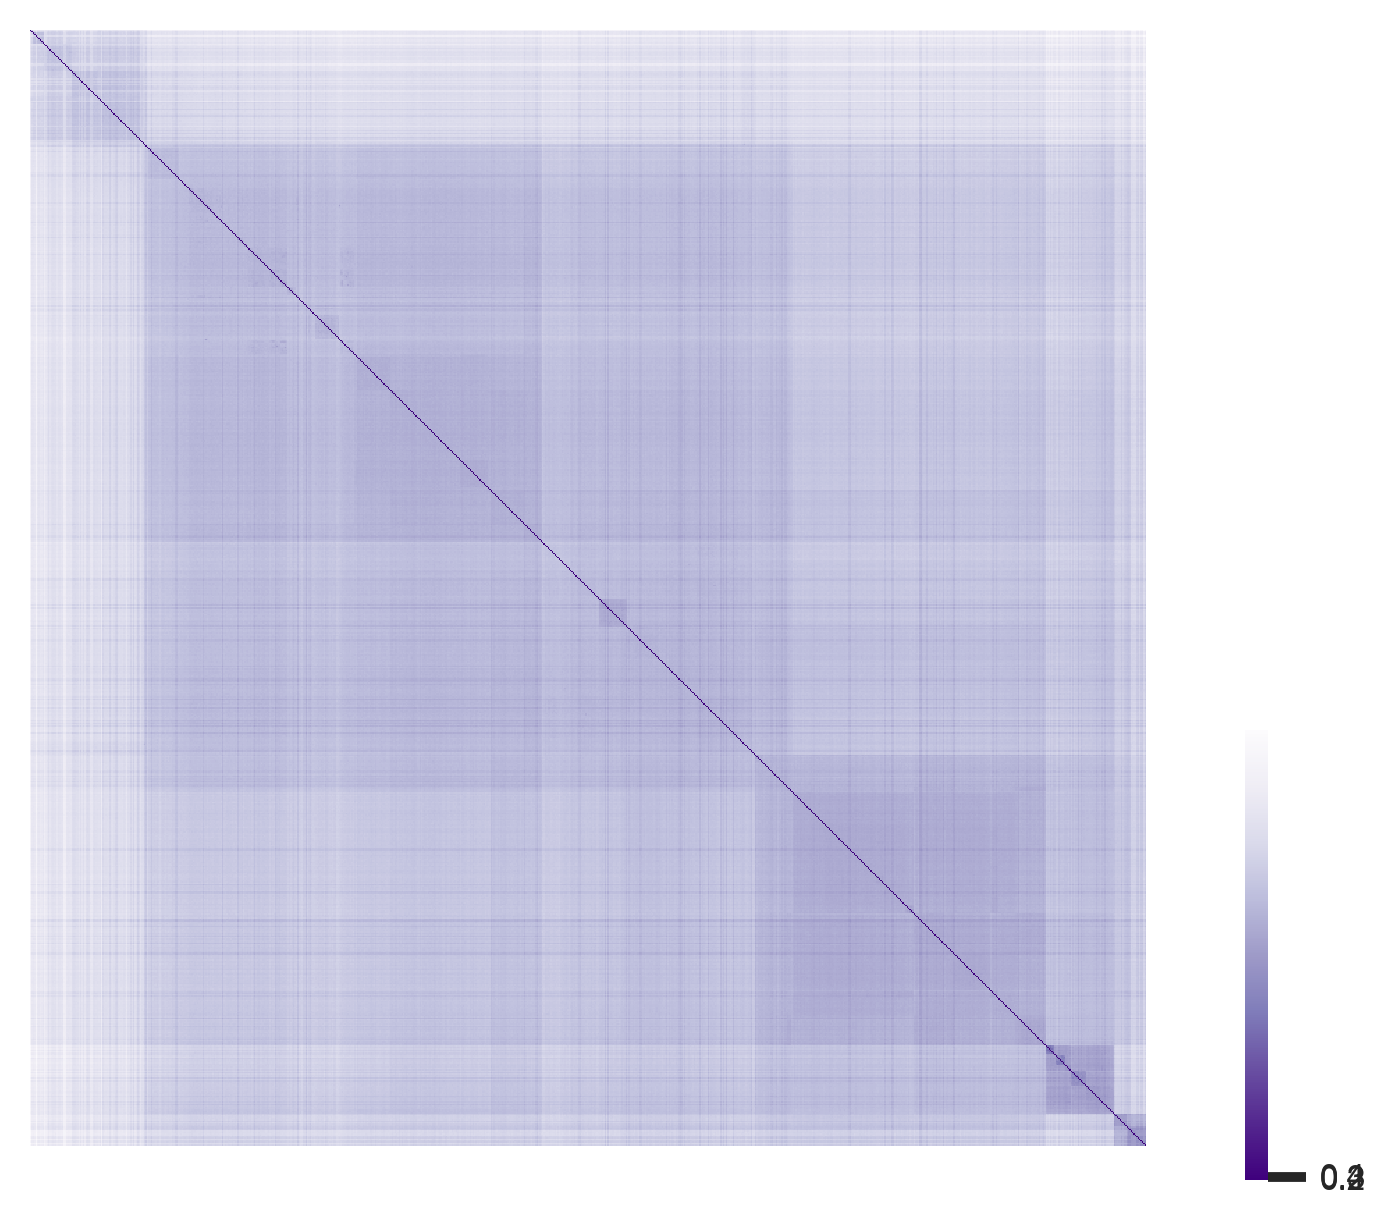

In [142]:
corr_reordered = hg_str_dist.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind]
#mask = np.triu(np.ones_like(corr_reordered, dtype=bool), k=0)
plt.figure(figsize=(6, 5), dpi = 300)
ax = sns.heatmap(
    corr_reordered,
    #mask = mask,
    square = True,
    xticklabels = False,
    yticklabels = False,
    cmap="Purples_r", #vmin = 10
    #cbar_kws={"shrink": 1}
)
# Grab the colorbar
cbar = ax.collections[0].colorbar
ticks =[0.2, 0.3, 0.4]
#ticks = [10, 15, 20, 25]
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(t) for t in ticks])
cbar.ax.tick_params(labelsize = 8)
# Move it to the bottom right: [left, bottom, width, height]
cbar.ax.set_position([0.8, 0.1, 1.5, 0.3]) 

In [67]:
region_geo = pd.read_csv("./figure1/kg_region_geo.csv")

In [66]:
region_geo.loc[region_geo["Mantel_p"] <= 0.05]

Superpopulation Marker  Mantel_r  Mantel_p
5           Europe    SNP  0.778368  0.000999
10       East Asia    STR  0.420287  0.002997
11       East Asia    SNP  0.724699  0.000999
12         America    STR  0.893186  0.007992
13         America    SNP  0.853554  0.007992

Text(0.5, 1.0, '1KGP')

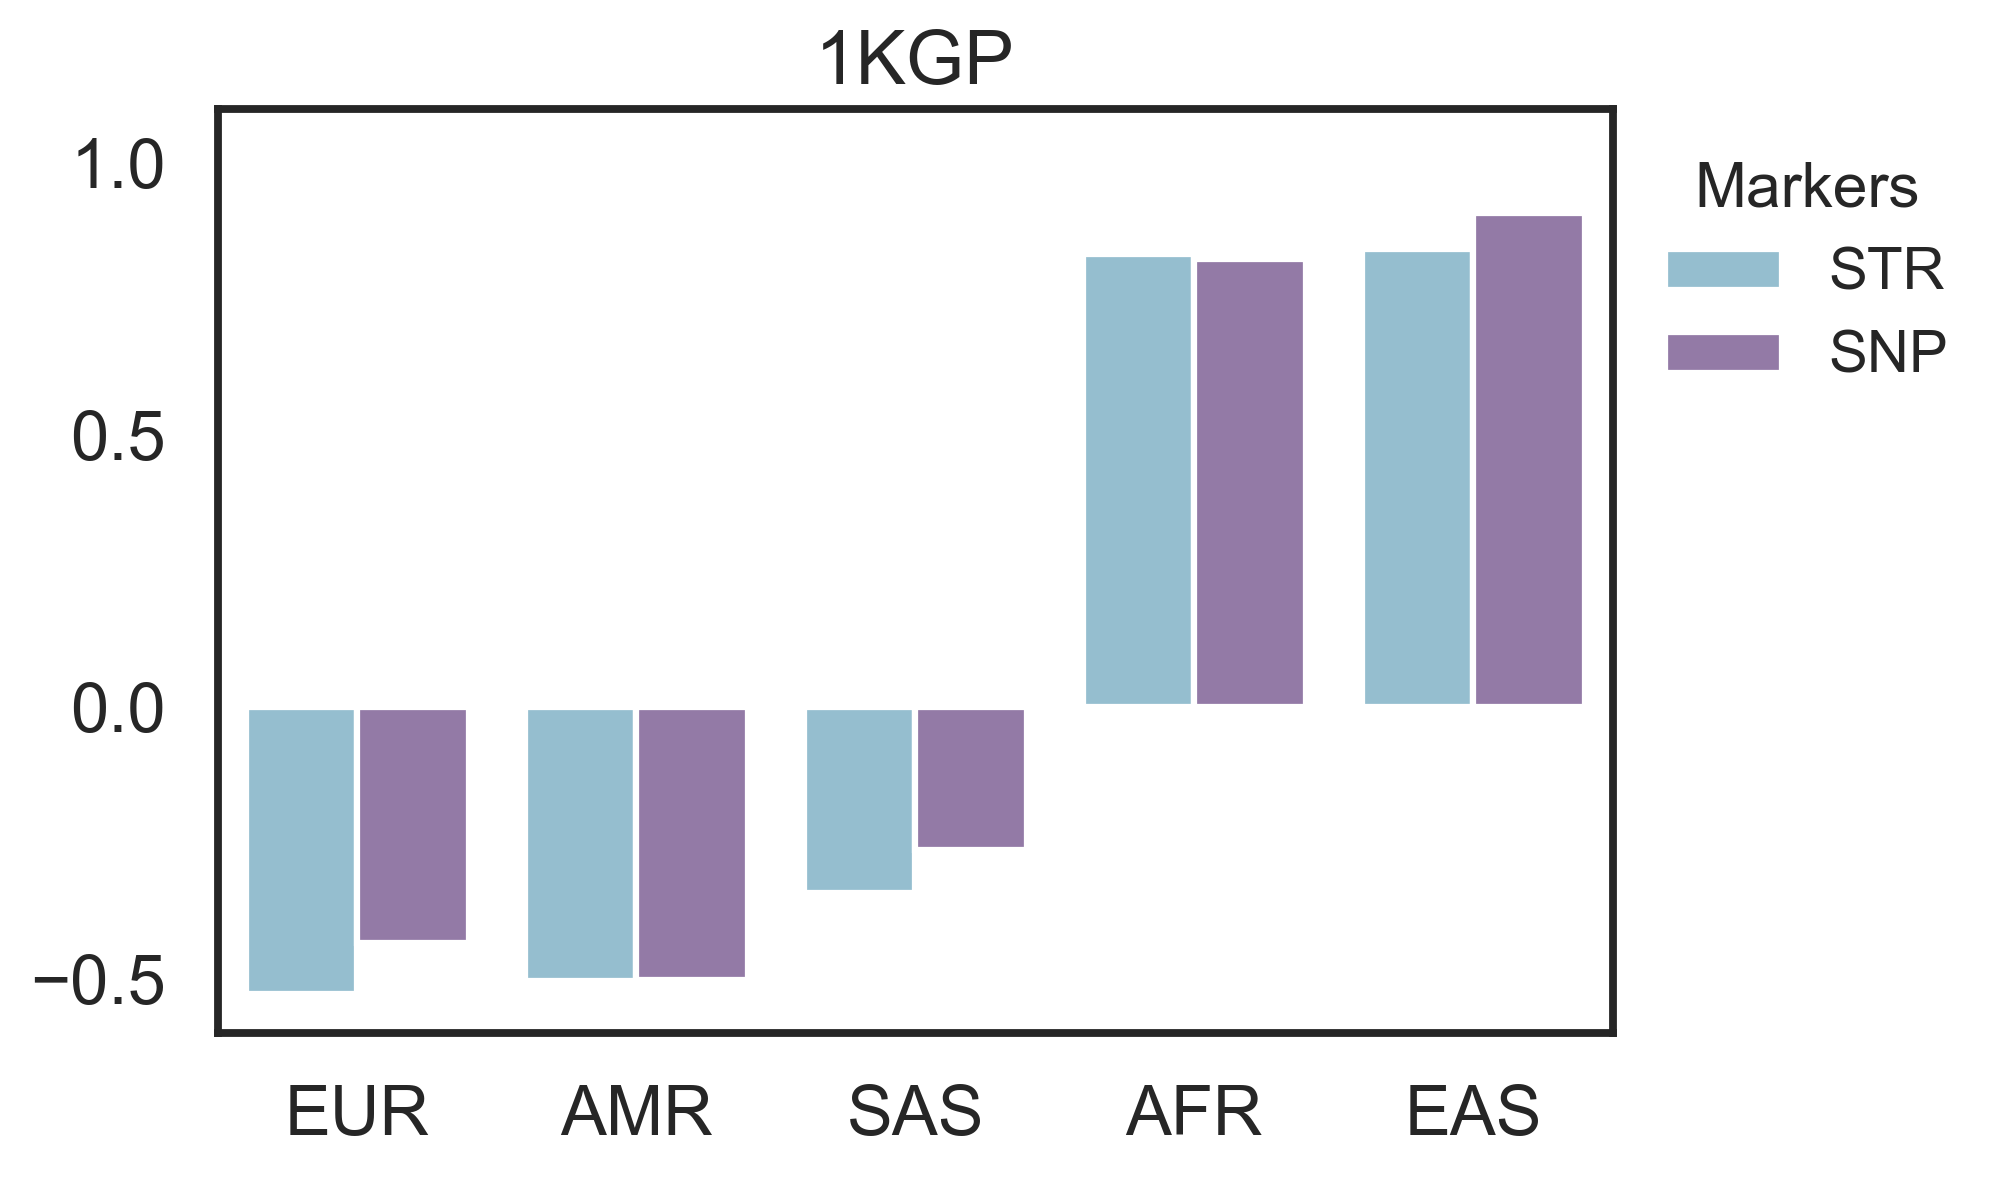

In [68]:
x_order = region_geo.query("Marker == 'STR' ").sort_values(["Mantel_r"])["Superpopulation"]
plt.figure(figsize=(6, 4), dpi = 300)
sns.set_context("talk", font_scale=1.0)
sns.set_style("white")
g = sns.barplot(data = region_geo, x = "Superpopulation", 
                y = "Mantel_r", hue = "Marker", 
                palette = [sns.color_palette("muted")[-1],sns.color_palette("muted")[4]] ,
                saturation = 0.6,
                order = x_order)
handles, labels = g.get_legend_handles_labels()
g.legend(
    handles[:2], ["STR", "SNP"], 
    title="Markers", fontsize=14, title_fontsize=15,
    loc="upper left", bbox_to_anchor=(1,1), frameon=False
)
g.set_ylabel("")
g.set_xlabel("")
g.set_ylim(-0.6,1.1)
g.set_title("1KGP")
#g.set_xticklabels(["AFR", "CSA", "EAS", "EUR", "AMR", "MIE", "OCE"])
#g.tick_params(axis="x", rotation = 90)